# Chapter 7

In [1]:
using ControlSystems
using Plots; gr()
using LinearAlgebra

## オブザーバ

In [2]:
A = [0 1; -4 5]
B = [0; 1]
C = [1 0]
D = 0
P = ss(A, B, C, D)
println(P)

A = [0 1; -4 5]
B = [0; 1]
C = [1 0; 0 1]
D = [0; 0]
Ps = ss(A, B, C, D)
println(Ps)

StateSpace{Continuous, Int64}
A = 
  0  1
 -4  5
B = 
 0
 1
C = 
 1  0
D = 
 0

Continuous-time state-space model
StateSpace{Continuous, Int64}
A = 
  0  1
 -4  5
B = 
 0
 1
C = 
 1  0
 0  1
D = 
 0
 0

Continuous-time state-space model


### オブザーバゲインの設計（極配置）

In [3]:
# オブザーバ極
observer_poles=[-15+5im,-15-5im]

# オブザーバゲインの設計（状態フィードバックの双対） 
L = -place(P.A', P.C', observer_poles)'
println(L)

ComplexF64[-35.0 + 0.0im; -421.0 + 0.0im;;]


In [4]:
L = [ convert(Float64, L[i]) for i in 1:length(L) ]

2-element Vector{Float64}:
  -35.0
 -421.0

In [5]:
eigvals(P.A + L * P.C)

2-element Vector{ComplexF64}:
 -15.000000000000002 - 4.9999999999999964im
 -15.000000000000002 + 4.9999999999999964im

In [6]:
# レギュレータ極
regulator_poles = [-5+5im, -5-5im]
# 極配置
F = -place(P.A, P.B, regulator_poles)
println(F)

ComplexF64[-46.0 - 0.0im -15.0 - 0.0im]


In [7]:
F = [ convert(Float64, F[i]) for i in 1:length(F) ]'

1×2 adjoint(::Vector{Float64}) with eltype Float64:
 -46.0  -15.0

In [8]:
Gsf = ss(P.A + P.B*F, P.B, [1 0; 0 1], [0; 0]);
Obs = ss(P.A + L*P.C, [P.B -L], [1 0; 0 1], [0 0; 0 0]);

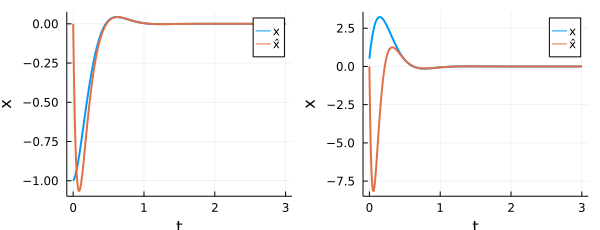

In [9]:
Td = 0:0.01:3;
X0 = [-1, 0.5];
u(x,t) = 0;
y, t, x, uout = lsim(Gsf, u, Td, x0=X0);

Ud = F*x;
y, t, xhat, uout = lsim(Obs, [Ud' y[1,:]]', Td, [0, 0]);

p = [ plot(), plot()]

for i=1:2
plot!(p[i], t, x[i,:],
    xlabel="t",   #X軸のラベル
    ylabel="x",   #Y軸のラベル
    lw=2,           #線幅
    ls=:solid,        #線種
    label="x",
    size=(300,230)   #プロットのサイズ 
)
    
plot!(p[i], t, xhat[i,:],
    xlabel="t",   #X軸のラベル
    ylabel="x",   #Y軸のラベル
    lw=2,           #線幅
    ls=:solid,        #線種
    label="x̂",
    size=(300,230)   #プロットのサイズ 
)
end

plot( p[1], p[2], layout=(1,2), size=(600,230) )

### 出力フィードバック

In [10]:
# 出力フィードバック（オブザーバ＋状態フィードバック）
K = ss(P.A+P.B*F+L*P.C, -L, F, 0)
println("K:\n", K)
println("----------------")
println("K(s)=\n", tf(K))
 
# フィードバック系
Gfb = feedback(P, K);

K:
StateSpace{Continuous, Float64}
A = 
  -35.0    1.0
 -471.0  -10.0
B = 
  35.0
 421.0
C = 
 -46.0  -15.0
D = 
 0.0

Continuous-time state-space model
----------------
K(s)=
TransferFunction{Continuous, ControlSystems.SisoRational{Float64}}
-7925.000000000001s - 9215.999999997051
---------------------------------------
        1.0s^2 + 45.0s + 821.0

Continuous-time transfer function model


In [11]:
# Td = 0:0.01:3;

# u(x,t) = 0;
# y, t, x, uout = lsim(Gfb, Td, u, [-1, 0.5, 0, 0])

# plot(t, x',
#     xlabel="t",   #X軸のラベル
#     ylabel="x",   #Y軸のラベル
#     lw=2,           #線幅
#     ls=:solid,        #線種
#     legend=false,
#     size=(300,230)   #プロットのサイズ 
# )

### 外乱オブザーバ

In [2]:
using ControlSystems
using Plots; gr()
using LinearAlgebra

In [3]:
A = [0 1; -4 5]
B = [0; 1]
C = [1 0]
D = 0
P = ss(A, B, C, D)
println(P)

A = [0 1; -4 5]
B = [0; 1]
C = [1 0; 0 1]
D = [0; 0]
Ps = ss(A, B, C, D)
println(Ps)

StateSpace{Continuous, Int64}
A = 
  0  1
 -4  5
B = 
 0
 1
C = 
 1  0
D = 
 0

Continuous-time state-space model
StateSpace{Continuous, Int64}
A = 
  0  1
 -4  5
B = 
 0
 1
C = 
 1  0
 0  1
D = 
 0
 0

Continuous-time state-space model


出力に0.5の定値外乱が加わるとする

In [4]:
# オブザーバ極
observer_poles=[-15+5im,-15-5im]
# オブザーバゲインの設計（状態フィードバックの双対） 
L = -place(P.A', P.C', observer_poles)'
L = [ convert(Float64, L[i]) for i in 1:length(L) ]

# レギュレータ極
regulator_poles = [-5+5im, -5-5im]
# 極配置
F = -place(P.A, P.B, regulator_poles)
F = [ convert(Float64, F[i]) for i in 1:length(F) ]'


Gsf = ss(P.A + P.B*F, P.B, [1 0; 0 1], [0; 0]);
Obs = ss(P.A + L*P.C, [P.B -L], [1 0; 0 1], [0 0; 0 0]);

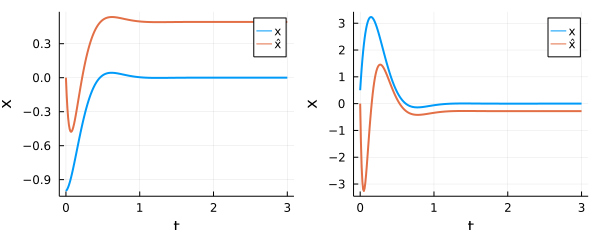

In [5]:
Td = 0:0.01:3;
d = 0.5
X0 = [-1, 0.5];
u(x,t) = 0;
y, t, x, uout = lsim(Gsf, u, Td, x0=X0);

Ud = F*x;
y, t, xhat, uout = lsim(Obs, [Ud' y[1,:].+d]', Td, [0, 0]);

p = [ plot(), plot()]

for i=1:2
plot!(p[i], t, x[i,:],
    xlabel="t",   #X軸のラベル
    ylabel="x",   #Y軸のラベル
    lw=2,           #線幅
    ls=:solid,        #線種
    label="x",
    size=(300,230)   #プロットのサイズ 
)
    
plot!(p[i], t, xhat[i,:],
    xlabel="t",   #X軸のラベル
    ylabel="x",   #Y軸のラベル
    lw=2,           #線幅
    ls=:solid,        #線種
    label="x̂",
    size=(300,230)   #プロットのサイズ 
)
end

plot( p[1], p[2], layout=(1,2), size=(600,230) )

In [6]:
# オブザーバ極
observer_poles=[-15+5im,-15-5im, -3] 

# オブザーバゲインの設計（状態フィードバックの双対）
Abar = [ P.A zeros(2,1) ; 0 0 0 ] 
Bbar = [ P.B; 0 ]
Cbar = [ P.C 1 ]

Lbar = -place(Abar', Cbar', observer_poles)'
Lbar = [ convert(Float64, Lbar[i]) for i in 1:length(Lbar) ]

println(Lbar)

[149.5, -526.0, -187.5]


In [7]:
Fbar = [ F 0 ]

Aob = Abar + Lbar*Cbar
Bob = [Bbar -Lbar]
Obs = ss(Aob, Bob, [1 0 0; 0 1 0; 0 0 1], [0 0; 0 0; 0 0] );

In [8]:
pole(Obs)

3-element Vector{ComplexF64}:
 -15.000000000000306 + 4.999999999999643im
 -15.000000000000306 - 4.999999999999643im
 -2.9999999999994746 + 0.0im

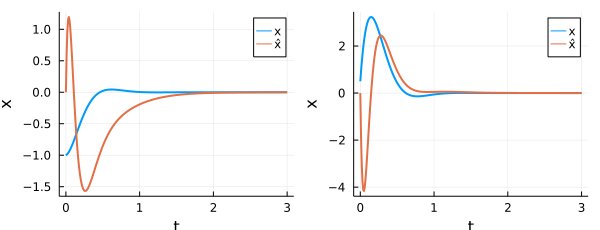

In [9]:
Td = 0:0.01:3;
d = 0.5
X0 = [-1, 0.5];
u(x,t) = 0;
y, t, x, uout = lsim(Gsf, u, Td, x0=X0);

Ud = F*x;
y, t, xhat, uout = lsim(Obs, [Ud' y[1,:].+d]', Td, [0, 0, 0]);

p = [ plot(), plot()]

for i=1:2
plot!(p[i], t, x[i,:],
    xlabel="t",   #X軸のラベル
    ylabel="x",   #Y軸のラベル
    lw=2,           #線幅
    ls=:solid,        #線種
    label="x",
    size=(300,230)   #プロットのサイズ 
)
    
plot!(p[i], t, xhat[i,:],
    xlabel="t",   #X軸のラベル
    ylabel="x",   #Y軸のラベル
    lw=2,           #線幅
    ls=:solid,        #線種
    label="x̂",
    size=(300,230)   #プロットのサイズ 
)
end

plot( p[1], p[2], layout=(1,2), size=(600,230) )

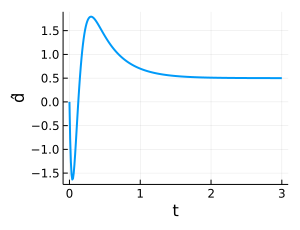

In [10]:
plot(t, xhat[3,:],
    xlabel="t",   #X軸のラベル
    ylabel="d̂",   #Y軸のラベル
    lw=2,           #線幅
    ls=:solid,        #線種
    legend=false,
    size=(300,230)   #プロットのサイズ 
)

外乱 0.5 が推定できている

## ロバスト制御

In [1]:
using ControlSystems
using Plots; gr()
using LinearAlgebra

In [2]:
g  = 9.81                # 重力加速度[m/s^2]
l  = 0.2                 # アームの長さ[m]
M  = 0.5                 # アームの質量[kg]
mu = 1.5e-2              # 粘性摩擦係数
J  = 1.0e-2              # 慣性モーメント

P = tf( [0,1], [J, mu, M*g*l] )

ref = 30 # 目標角度 [deg]

30

### 乗法的不確かさ

In [3]:
# 垂直駆動アームのノミナルモデル
Pn = tf( [0,1], [J, mu, M*g*l] )

# 不確かさ
delta = LinRange(-1, 1, 100)
WT = tf( [10, 0], [1, 150])

P = TransferFunction[ (1 + WT*delta[i])*Pn for i in 1:length(delta) ];
DT = TransferFunction[ WT*delta[i] for i in 1:length(delta) ];

setPlotScale("dB")
w = exp10.(LinRange(-2, 3, 1000))
bodeplot(P, w; lc=:black, lw=0.5, size=(450,400), legend=false, title=""  )

In [4]:
bodeplot(DT, w; lc=:black, lw=0.5, size=(450,400), legend=false, title=""  )

### 混合感度問題

確認中

In [ ]:
# from control import mixsyn

# WS = tf( [0, 1], [1, 1, 0.25]) # 感度関数に対する重み関数 
# WU = tf(1, 1)
# WT = tf( [10, 0], [1, 150]) # 相補感度関数に対する重み関数

# # 混合感度問題
# K, _, gamma = mixsyn(Pn, w1=WS , w2=WU, w3=WT) 

# print('K=', ss2tf(K))
# print('gamma =', gamma[0])

# fig, ax = plt.subplots(1, 2, figsize=(6,2.3))

# # 感度関数
# Ssys = feedback(1, Pn*K)
# gain, _, w = bode(Ssys, logspace(-3,3), plot=False)
# ax[0].semilogx(w, 20*np.log10(gain), ls= '-', lw =2, label='$S$', color='k')

# gain, _, w = bode(1/WS, logspace(-3,3), plot=False)
# ax[0].semilogx(w, 20*np.log10(gain), ls= '-.', lw =1, label='$1/W_S$', color='k')

# # 相補感度関数
# Tsys = feedback(Pn*K, 1)
# gain, _, w = bode(Tsys, logspace(-3,3), plot=False)
# ax[1].semilogx(w, 20*np.log10(gain), ls = '-', lw =2, label='$T$', color='k')

# gain, _, w = bode(1/WT, logspace(-3,3), plot=False)
# ax[1].semilogx(w, 20*np.log10(gain), ls= '--', lw =1, label='$1/W_T$', color='k')

# for i in range(2):
#     ax[i].set_ylim(-40, 40)
#     ax[i].legend()
#     ax[i].grid(which="both", ls=':')
#     ax[i].set_ylabel('Gain [dB]')
#     ax[i].set_xlabel('$\omega$ [rad/s]')

# fig.tight_layout()
# # fig.savefig("robust_design.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

In [ ]:
# fig, ax = plt.subplots(figsize=(3, 2.3))

# for i in range(len(delta)):
#     P = (1 + WT*delta[i])*Pn
#     Gyr = feedback(P*K, 1)
    
#     y, t = step(Gyr, np.arange(0,5,0.01))

#     ax.plot(t, y*ref, color ='k', lw =0.3)

# Gyr = feedback(Pn*K, 1)
# y, t = step(Gyr, np.arange(0,5,0.01))
# ax.plot(t, y*ref, lw =2, color='k')

# plot_set(ax, 't', 'y')
# ax.set_xlim(0, 2)
# ax.set_ylim(0, 60)

# # fig.savefig("robust_step.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

### PID制御との比較

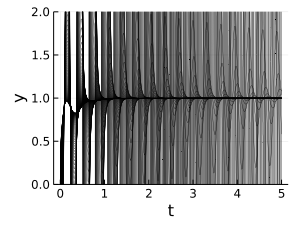

In [5]:
kp = 2
kd = 0.1
ki = 10

plt = plot()
for i in 1:1:length(delta)
    Kpid = tf([kd, kp, ki], [1, 0])
    
    P = (1 + WT*delta[i])*Pn
    Gyr = feedback(P*Kpid, 1)
    y, t = step(Gyr, 0:0.01:5 )
    plot!(plt, t, y', lc=:black, lw =0.3)
end

plot!(plt,
    xlabel="t",   #X軸のラベル
    ylabel="y",   #Y軸のラベル
    ylim = (0,2),
    lw=2,           #線幅
    ls=:solid,        #線種
    legend=false,
    size=(300,230)   #プロットのサイズ 
)

ナイキスト線図で不確かさの影響を確認する

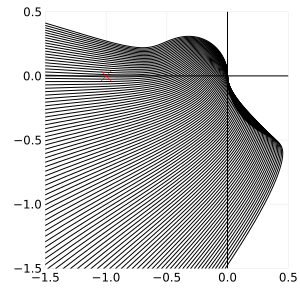

In [9]:
Kpid = tf([kd, kp, ki], [1, 0])
H = TransferFunction[ Kpid*(1 + WT*delta[i])*Pn for i in 1:length(delta) ];
nyquistplot(H, gaincircle=true, lc = :black, lw = 1, xlim=(-1.5,0.5), ylim=(-1.5,0.5), size=(300,300), legend=false)

## ディジタル実装

In [10]:
using ControlSystems
using Plots; gr()
using LinearAlgebra

In [11]:
P = tf([0, 1], [0.5, 1])
println("連続時間システム",P)

連続時間システムTransferFunction{Continuous, ControlSystems.SisoRational{Float64}}
   1.0
----------
0.5s + 1.0

Continuous-time transfer function model


In [12]:
ts = 0.2

Pd1 = c2d(P, ts, :zoh)
println("離散時間システム（zoh）", Pd1)

離散時間システム（zoh）TransferFunction{Discrete{Float64}, ControlSystems.SisoRational{Float64}}
   0.3296799539643608
-------------------------
1.0z - 0.6703200460356393

Sample Time: 0.2 (seconds)
Discrete-time transfer function model


In [13]:
Pd2 = c2d(P, ts, :tustin)
print("離散時間システム（tustin）",Pd2)

離散時間システム（tustin）TransferFunction{Discrete{Float64}, ControlSystems.SisoRational{Float64}}
0.16666666666666669z + 0.1666666666666667
-----------------------------------------
        1.0z - 0.6666666666666667

Sample Time: 0.2 (seconds)
Discrete-time transfer function model

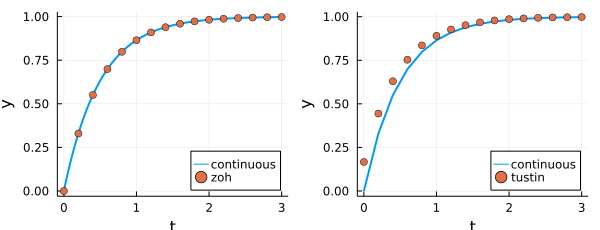

In [14]:
Tc = 0:0.01:3
y, t = step(P, Tc)

Td = 0:ts:3;

p = [ plot(), plot()]

plot!(p[1], t, y',
    xlabel="t",   #X軸のラベル
    ylabel="y",   #Y軸のラベル
    lw=2,           #線幅
    ls=:solid,        #線種
    label="continuous",
    size=(300,230)   #プロットのサイズ 
)

y, t = step(Pd1, Td)

plot!(p[1], t, y',
    seriestype = :scatter,
    xlabel="t",   #X軸のラベル
    ylabel="y",   #Y軸のラベル
    label="zoh",
    legend=:bottomright,
    size=(300,230)   #プロットのサイズ 
)
    
plot!(p[2], t, y',
    xlabel="t",   #X軸のラベル
    ylabel="y",   #Y軸のラベル
    lw=2,           #線幅
    ls=:solid,        #線種
    label="continuous",
    size=(300,230)   #プロットのサイズ 
)

y, t = step(Pd2, Td)

plot!(p[2], t, y',
    seriestype = :scatter,
    xlabel="t",   #X軸のラベル
    ylabel="y",   #Y軸のラベル
    label="tustin",
    legend=:bottomright,
    size=(300,230)   #プロットのサイズ 
)
    

plot( p[1], p[2], layout=(1,2), size=(600,230) )

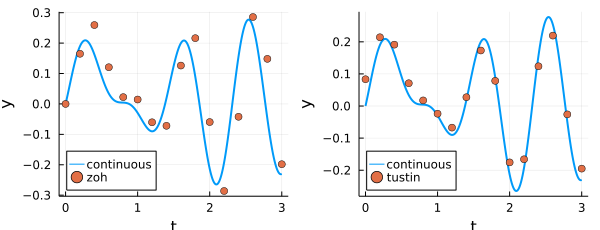

In [15]:
Tc = 0:0.01:3

u(x,t) = 0.5 * sin.(6*t) + 0.5 * cos.(8*t)
yc, tc, x, uout = lsim(P, u, Tc);

Td = 0:ts:3;

p = [ plot(), plot()]

plot!(p[1], tc, yc',
    xlabel="t",   #X軸のラベル
    ylabel="y",   #Y軸のラベル
    lw=2,           #線幅
    ls=:solid,        #線種
    label="continuous",
    size=(300,230)   #プロットのサイズ 
)

y, t, x, uout = lsim(Pd1, u, Td);

plot!(p[1], t, y',
    seriestype = :scatter,
    xlabel="t",   #X軸のラベル
    ylabel="y",   #Y軸のラベル
    label="zoh",
    legend=:bottomleft,
    size=(300,230)   #プロットのサイズ 
)
    
plot!(p[2], tc, yc',
    xlabel="t",   #X軸のラベル
    ylabel="y",   #Y軸のラベル
    lw=2,           #線幅
    ls=:solid,        #線種
    label="continuous",
    size=(300,230)   #プロットのサイズ 
)

y, t, x, uout = lsim(Pd2, u, Td);

plot!(p[2], t, y',
    seriestype = :scatter,
    xlabel="t",   #X軸のラベル
    ylabel="y",   #Y軸のラベル
    label="tustin",
    legend=:bottomleft,
    size=(300,230)   #プロットのサイズ 
)
    

plot( p[1], p[2], layout=(1,2), size=(600,230) )

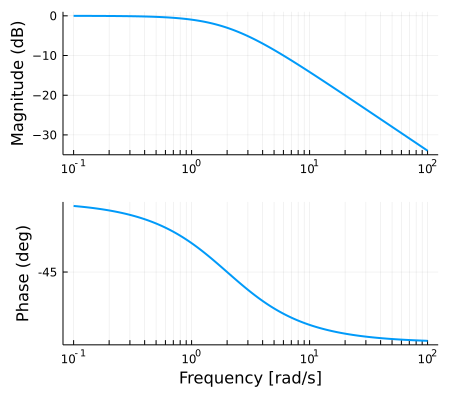

In [16]:
setPlotScale("dB")
bodeplot(P, lw=2, size=(450,400), legend=false, title=""  )

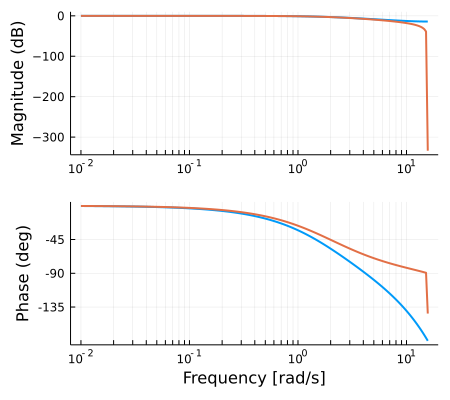

In [17]:
setPlotScale("dB")
bodeplot([Pd1, Pd2], lw=2, size=(450,400), legend=false, title=""  )